In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Import Data

## Read CSV

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#Variabel

survival - Survival (0 = No; 1 = Yes)

class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Statistika deskriptif dari data

In [3]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Check value yang kosong

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Preprocessing

## Isi data kosong pada Kolom Age dengan Median

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())

## Isi data kosong pada Kolom Embarked dengan Modus

In [6]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## Drop kolom Cabin karena banyak yang kosong

In [7]:
df = df.drop('Cabin', axis=1)

## Check hasil setelah di preprocess

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA

Exploratory Data Analysis (EDA) adalah proses awal dalam analisis data yang bertujuan untuk memahami struktur dan karakteristik dalam dataset dengan melakukan Statistika Deskriptif dan visualisasi data.

## Import library untuk EDA

In [9]:
#library untuk membuat grafik/plot
import matplotlib.pyplot as plt 
import seaborn as sns

## Analisis Kolom Age

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


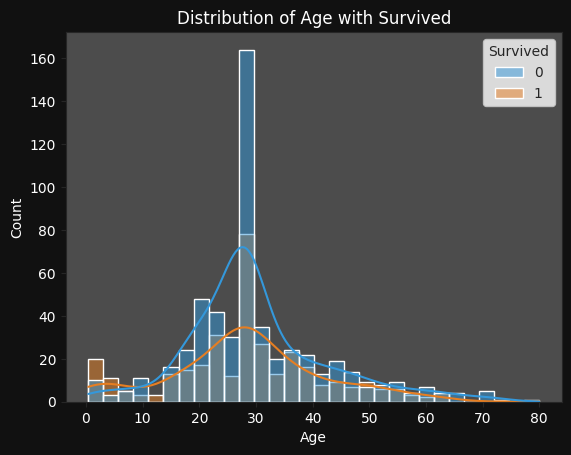

In [10]:
# Mengatur tema dan gaya
sns.set_style('ticks')  # Menggunakan tema gelap untuk latar belakang
fig, ax = plt.subplots(facecolor='#111111')  # Mengatur warna background keseluruhan figure
ax.set_facecolor('#4C4C4C')

# Plot histogram dengan warna neon
sns.histplot(data=df, x='Age', hue='Survived', kde=True, palette=['#3498db', '#e67e22'])

# Mengatur judul dan warna teks
plt.title('Distribution of Age with Survived', color='white')
plt.xlabel('Age', color='white')
plt.ylabel('Count', color='white')

# Mengatur warna label pada sumbu x dan y
plt.xticks(color='white')
plt.yticks(color='white')

# Menampilkan plot
plt.show()


Anak-anak di bawah 10 tahun lebih berpeluang selamat, bisa jadi karena diprioritaskan untuk diselamatkan menggunakan sekoci. Hal ini terlihat dari histogram yang membandingkan jumlah penumpang selamat (Survived) yang ditandai dengan angka 0 berwarna kuning dan penumpang tidak selamat ditandai dengan angka 1 berwarna biru.

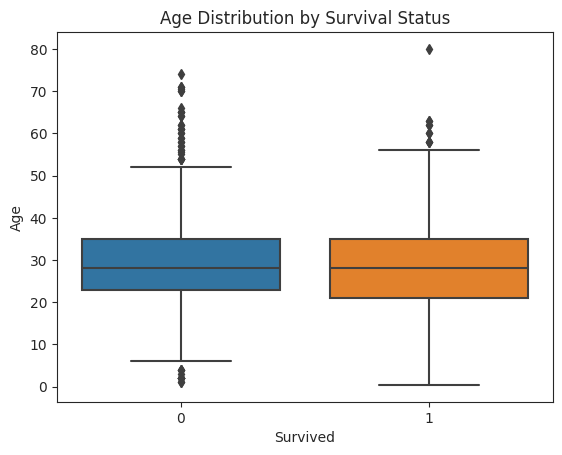

In [11]:
sns.set_style('ticks')  # Menggunakan tema gelap untuk latar belakang


sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age Distribution by Survival Status')
plt.show()

Area box Survived = 1 (Selamat) lebih rendah dibandingkan yang tidak selamat

### Analisis Kolom Fare

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


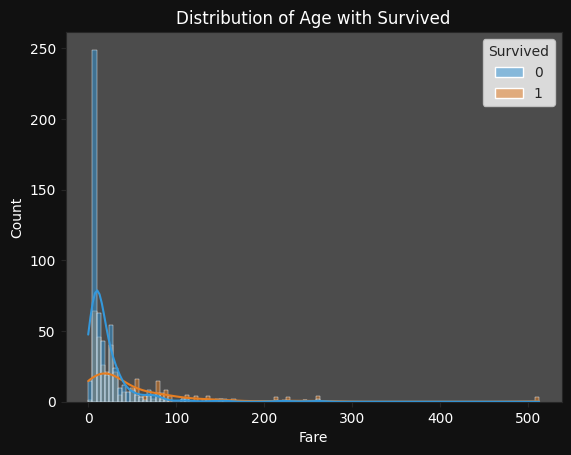

In [12]:
fig, ax = plt.subplots(facecolor='#111111')  # Mengatur warna background keseluruhan figure
ax.set_facecolor('#4C4C4C')

sns.histplot(data=df, x='Fare', hue='Survived', kde=True, palette=['#3498db', '#e67e22'])
plt.title('Distribution of Age with Survived', color='white')
plt.xlabel('Fare', color='white')
plt.ylabel('Count', color='white')

# Mengatur warna label pada sumbu x dan y
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

Penumpang dengan biaya yang tinggi lebih berpeluang selamat dibanding yang memiliki biaya rendah

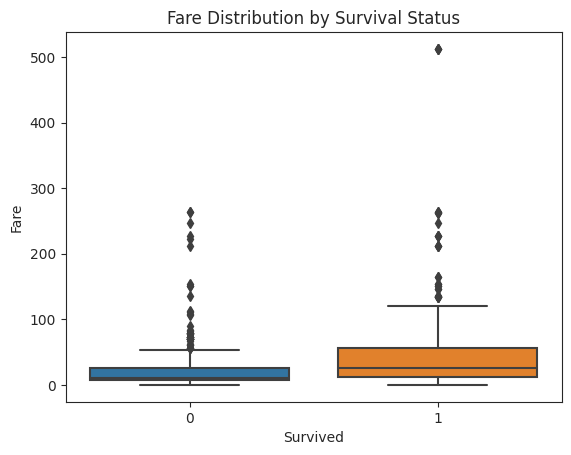

In [13]:
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival Status')
plt.show()

Area Boxplot yang selamat pada kolom Fare lebih tinggi dibandingkan yang tidak selamat

## Analisis Kolom Pclass

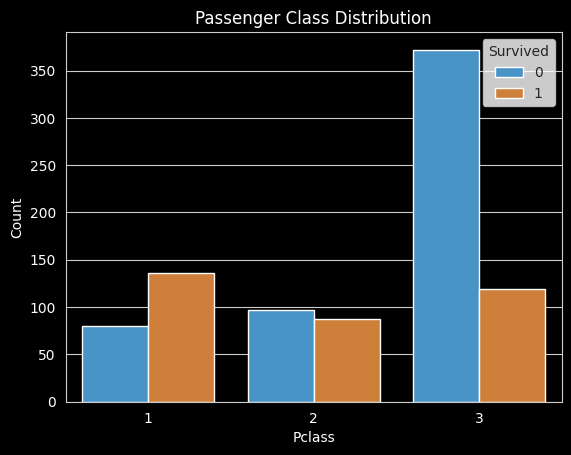

In [14]:
# Count plot for categorical features
sns.set_style('whitegrid')
fig, ax = plt.subplots()
sns.countplot(data=df, x='Pclass', hue='Survived', palette = ['#3498db', '#e67e22'])

plt.gcf().set_facecolor('#000001')
ax.set_facecolor('#000000')

plt.title('Passenger Class Distribution', color= 'white')
plt.xlabel('Pclass', color='white')
plt.ylabel('Count', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

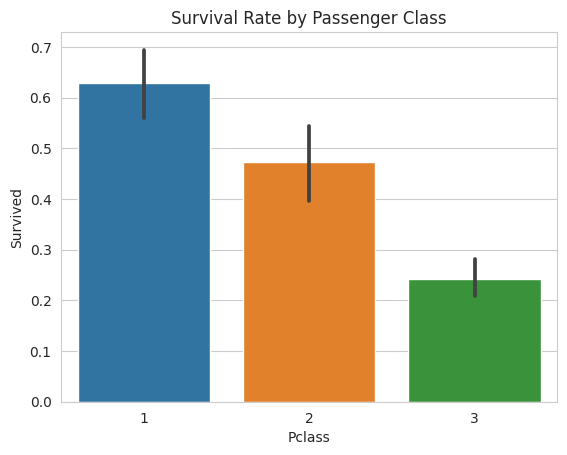

In [15]:
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

Persentase orang yang selamat pada Pclass = 1 lebih besar dibandingkan Pclass 2 dan 3

## Analisis Kolom Sex

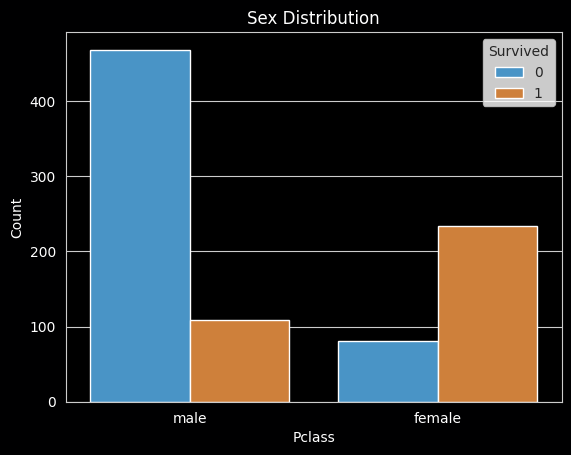

In [16]:
# Count plot for categorical features
sns.set_style('whitegrid')
fig, ax = plt.subplots()

sns.countplot(data=df, x='Sex', hue='Survived', palette=['#3498db', '#e67e22'])

plt.gcf().set_facecolor('#000001')
ax.set_facecolor('#000000')

plt.title('Sex Distribution',color= 'white')
plt.xlabel('Pclass', color='white')
plt.ylabel('Count', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

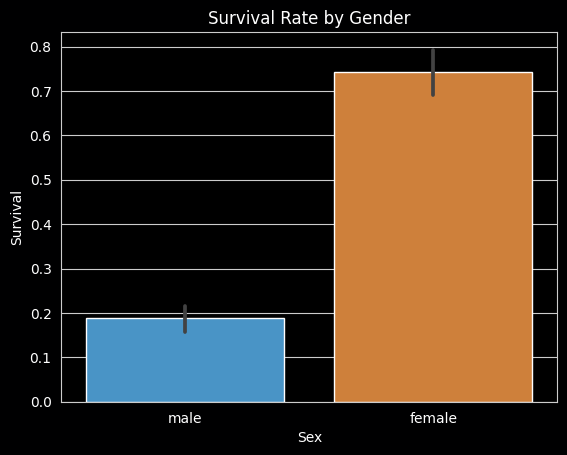

In [17]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()


sns.barplot(data=df, x='Sex', y='Survived', palette=['#3498db', '#e67e22'])
plt.gcf().set_facecolor('#000001')
ax.set_facecolor('#000000')

plt.title('Survival Rate by Gender',color= 'white')
plt.xlabel('Sex', color='white')
plt.ylabel('Survival', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

Persentase orang yang selamat pada Sex = female lebih tinggi dibandingkan male

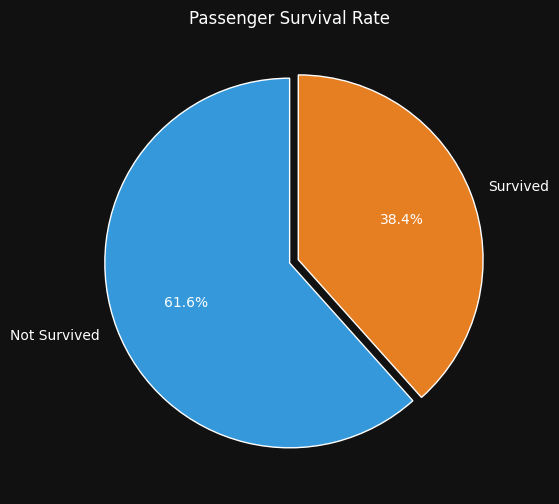

In [18]:
# Menghitung jumlah penumpang yang selamat (1) dan tidak selamat (0)
# Data untuk pie chart
survived = df['Survived'].value_counts()

# Membuat pie chart dengan warna coklat
plt.figure(figsize=(6,6))
plt.gcf().set_facecolor('#111111')  # Mengatur warna background figure menjadi gelap
plt.pie(survived, 
        labels=['Not Survived', 'Survived'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#3498db', '#e67e22'], 
        explode=[0, 0.05],
        textprops={'color': 'white'})

# Mengatur judul dan warna teks
plt.title('Passenger Survival Rate', color='white')

# Menampilkan plot
plt.show()


## Correlation Matrix

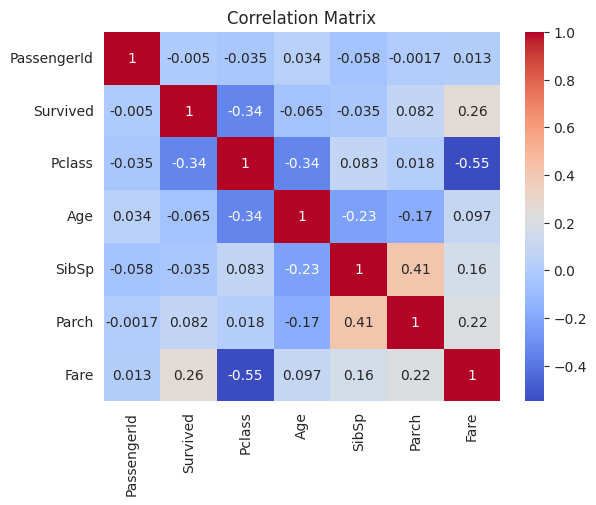

In [19]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Pclass dan Fare memiliki korelasi negativ, semakin rendah Pclass maka semakin tinggi Fare-nya
- Fitur yang paling berpengaruh terhadap Survived adalah Pclass

# Feature Engineering

Label Encoder untuk mengubah data kategorik menjadi numerik

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
Lab = LabelEncoder()
df["Sex"] = Lab.fit_transform(df["Sex"])
df['Embarked'] = Lab.fit_transform(df["Embarked"])

def highlight_cols(x): 
      
    # copy df to new - original data is not changed 
    dfs = df.copy() 
      
    # select all values to green color 
    dfs.loc[:, :] = 'background-color: Black'
      
    # overwrite values grey color 
    dfs[['Sex', 'Embarked']] = 'background-color: orange'
      
    # return color df 
    return dfs

In [22]:
print("Highlighted DataFrame :") 
display(df.style.apply(highlight_cols, axis=None))

Highlighted DataFrame :


/tmp/ipykernel_33/2813368537.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'background-color: Black' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfs.loc[:, :] = 'background-color: Black'
/tmp/ipykernel_33/2813368537.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'background-color: Black' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfs.loc[:, :] = 'background-color: Black'
/tmp/ipykernel_33/2813368537.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'background-color: Black' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dfs.loc[:, :] = 'background-color: Black'
/tmp/ipykernel_33/2813368537.py:11: FutureWarning: Setting an item of 

# Feature Selection

In [23]:
feature = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
x = df[feature]
y = df['Survived']

In [24]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [25]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [27]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [28]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,2
773,3,1,28.0,0,0,7.2250,0
25,3,0,38.0,1,5,31.3875,2
84,2,0,17.0,0,0,10.5000,2


In [29]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [30]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [31]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [32]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


# Modeling

# Classification model with Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(x_train, y_train)

RF_pred = model.predict(x_test)

comp = pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : RF_pred
})
comp

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
DecTre = DecisionTreeClassifier(random_state=42)
DecTre.fit(x_train, y_train)

Dec_pred = DecTre.predict(x_test)
Dec_pred

Comp_dec = pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : Dec_pred
})
Comp_dec

,Actual,Predicted
709,1,0
439,0,1
840,0,1
720,1,1
39,1,1
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


# STANDARISASI

In [35]:
from sklearn.preprocessing import StandardScaler

# Membuat instance StandardScaler
scaler = StandardScaler()

x_train[['Age', 'Fare','SibSp']] = scaler.fit_transform(x_train[['Age', 'Fare','SibSp']])
x_test[['Age', 'Fare','SibSp']] = scaler.fit_transform(x_test[['Age', 'Fare','SibSp']])

# KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train,y_train)

KNN_pred = KNN.predict(x_test)
KNN_pred

Comp_KNN = pd.DataFrame({
    'Actual' : y_test,
    'Predicted' :KNN_pred
})
Comp_KNN

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


In [37]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, 30)}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Menampilkan n_neighbors terbaik
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best cross-validation accuracy: {best_score:.2f}")

Best n_neighbors: 13
Best cross-validation accuracy: 0.80


* n_estimation menentukan jumlah pohon (trees) yang akan dibuat dalam Random Forest. Ketika kita set n_estimators = 100, ini berarti kita akan membuat 100 pohon keputusan (decision trees) yang berebda. Setiap pohon akan membuat prediksi, dan hasil akhir adalah kombinasi dari semua prediksi pohon tersebut.

* random_state adalah angka yang digunakan untuk mengatur 'benih' acak (Random seed). Penggunaan random_state memastikan bahwa hasil yang kita dapatkan dari menjalankan model selalu konsiten. Misalnya, setiap kali kita menjalankan kode dengan random_state = 42, hasilnya akan sama.

Evaluasi Model

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
from xgboost import XGBClassifier
XGB = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
XGB.fit(x_train,y_train)

XGB_pred = XGB.predict(x_test)
XGB_pred

Comp_XGB = pd.DataFrame({
    'Actual' : y_test,
    'Predicted' :XGB_pred
})
Comp_XGB

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


# Confusion Matrix

In [40]:
Conf_matrix_RF = confusion_matrix(y_test, RF_pred)
Conf_matrix_DT = confusion_matrix(y_test, Dec_pred)
Conf_matrix_KNN = confusion_matrix(y_test, KNN_pred)
Conf_matrix_XGB = confusion_matrix(y_test, XGB_pred)
print('Confusion Matrix:')
print(Conf_matrix_RF)
print(Conf_matrix_DT)
print(Conf_matrix_KNN)
print(Conf_matrix_XGB)

Confusion Matrix:
[[92 13]
 [19 55]]
[[83 22]
 [17 57]]
[[90 15]
 [19 55]]
[[88 17]
 [23 51]]


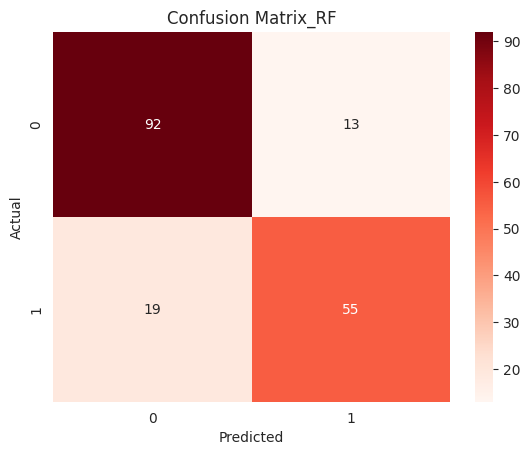

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(Conf_matrix_RF, annot = True, fmt = 'd', cmap= 'Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix_RF')
plt.show()

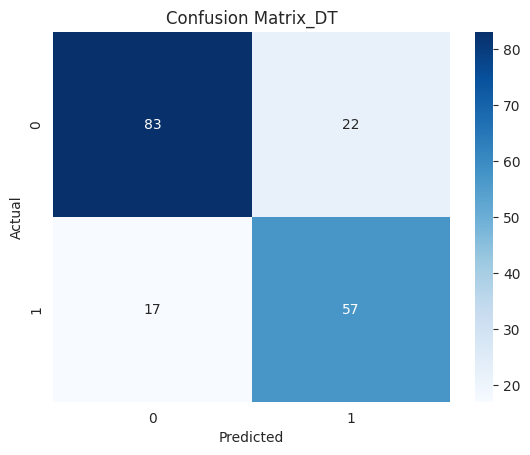

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(Conf_matrix_DT, annot = True, fmt = 'd', cmap= 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix_DT')
plt.show()

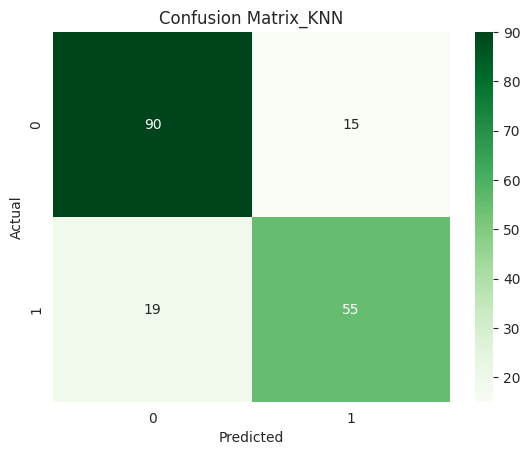

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(Conf_matrix_KNN, annot = True, fmt = 'd', cmap= 'Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix_KNN')
plt.show()

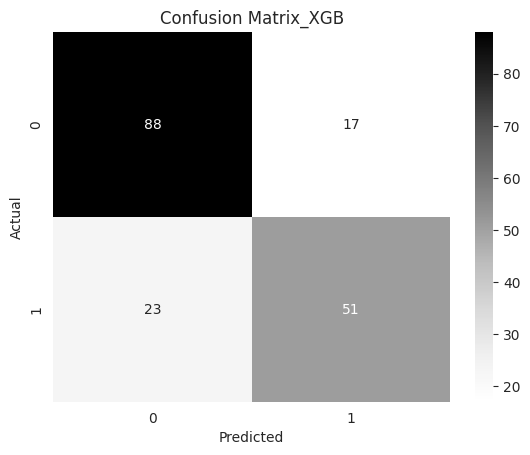

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(Conf_matrix_XGB, annot = True, fmt = 'd', cmap= 'Greys')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix_XGB')
plt.show()

# Accuracy

In [45]:
Acc_RF = accuracy_score(y_test, RF_pred)
Acc_DT = accuracy_score(y_test, Dec_pred)
Acc_KNN = accuracy_score(y_test, KNN_pred)
Acc_XGB = accuracy_score(y_test, XGB_pred)
print(f'Random Forest Model Accuracy: {Acc_RF:.2f}')
print(f'Decision Tree Model Accuracy: {Acc_DT:.2f}')
print(f'KNN Model Accuracy: {Acc_KNN:.2f}')
print(f'XGB Model Accuracy: {Acc_XGB:.2f}')

Random Forest Model Accuracy: 0.82
Decision Tree Model Accuracy: 0.78
KNN Model Accuracy: 0.81
XGB Model Accuracy: 0.78


           Model  Accuracy
0  Random Forest  0.821229
1  Decision Tree  0.782123
2            KNN  0.810056
3        XGBoost  0.776536


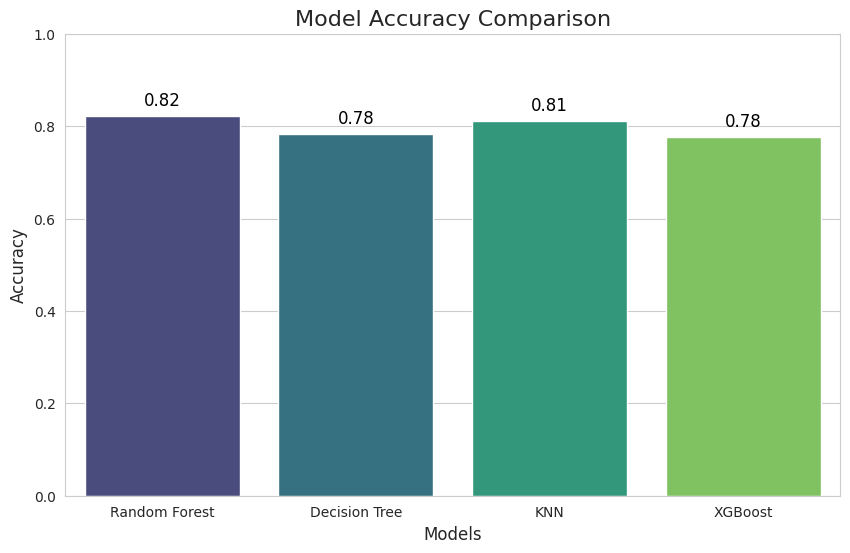

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Membuat DataFrame menggunakan dictionary
Acc = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'KNN', 'XGBoost'],
    'Accuracy': [Acc_RF, Acc_DT, Acc_KNN, Acc_XGB]
})

# Menampilkan DataFrame
print(Acc)

# Membuat Bar Chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=Acc, x='Model', y='Accuracy', palette='viridis')

# Menambahkan title dan label
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Menampilkan nilai akurasi di atas setiap bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=12, color='black', 
                      xytext=(0, 5),  # Offset untuk label
                      textcoords='offset points')

# Menampilkan plot
plt.ylim(0, 1)  # Mengatur batas y dari 0 ke 1 (persentase)
plt.show()


In [47]:
class_report_RF = classification_report(y_test, RF_pred)
print("Random Forest Classification Report:\n", class_report_RF)

class_report_DT = classification_report(y_test, Dec_pred)
print("Decision Tree Classification Report:\n", class_report_DT)

class_report_KNN = classification_report(y_test, KNN_pred)
print("KNN Classification Report:\n", class_report_KNN)

class_report_XGB = classification_report(y_test, XGB_pred)
print("XGB Classification Report:\n", class_report_XGB)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81 

In [48]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ... 

# feature importances

In [49]:
feature_importance = model.feature_importances_
feature_names = x_train.columns
df_feature_importance = pd.DataFrame({
    'Feature' : feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by = 'Importance', ascending = False)
df_feature_importance

,Feature,Importance
1,Sex,0.271410
5,Fare,0.265010
2,Age,0.249995
0,Pclass,0.086957
3,SibSp,0.053685
4,Parch,0.039897
6,Embarked,0.033044
